In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,accuracy_score
import pickle


In [2]:
data_df = pd.read_csv("../statistical_features_over_window/sub_1_w100_g1.csv").drop("Unnamed: 0",axis=1)
data_df

,variance,mean,skewness,kurtosis,class_4,class_2_arousal,arousal,valence
0,0.031139,8.115219,4.304744e-03,1.949733e-03,LL,L,5.0,5.0
1,0.032284,8.115219,4.339563e-03,2.018726e-03,LL,L,5.0,5.0
2,0.033404,8.115219,4.343896e-03,2.082307e-03,LL,L,5.0,5.0
3,0.034483,8.115219,4.314259e-03,2.138679e-03,LL,L,5.0,5.0
4,0.035515,8.115219,4.250955e-03,2.187956e-03,LL,L,5.0,5.0
...,...,...,...,...,...,...,...,...
48928,0.000221,8.115219,4.984886e-07,9.570860e-08,LL,L,5.0,5.0
48929,0.000216,8.115219,5.553624e-07,9.393173e-08,LL,L,5.0,5.0
48930,0.000211,8.115219,5.670860e-07,9.211443e-08,LL,L,5.0,5.0
48931,0.000207,8.115219,5.376168e-07,8.975282e-08,LL,L,5.0,5.0


In [3]:
for i in range(2,31):
    df = pd.read_csv(f"../statistical_features_over_window/sub_{i}_w100_g1.csv").drop("Unnamed: 0",axis=1)
    data_df = pd.concat([data_df,df],axis=0)

len(data_df)

1467990

In [4]:
filtered_data = data_df[(data_df["arousal"]!=5) & (data_df["valence"]!=5)]

In [5]:
filtered_data = filtered_data.reset_index().drop("index",axis=1)

In [6]:
data_2_class = filtered_data.drop(["class_4","arousal","valence"],axis=1)
data_4_class = filtered_data.drop(["class_2_arousal","arousal","valence"],axis=1)

In [7]:
data_2_class_encoded = pd.get_dummies(data_2_class,columns=["class_2_arousal"])

In [23]:
train_X,test_X,train_Y,test_Y = train_test_split(data_2_class.drop("class_2_arousal",axis=1) , data_2_class["class_2_arousal"] , test_size=0.05)

In [24]:
random_forest = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling improves the performance
    ('randomforest_clf', RandomForestClassifier(n_estimators=200, random_state=42))
])


In [25]:
random_forest.fit(train_X,train_Y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('randomforest_clf',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [29]:
with open('./random_forest.pkl', 'wb') as file:
    pickle.dump(random_forest, file)

In [26]:
pred_Y = random_forest.predict(test_X)

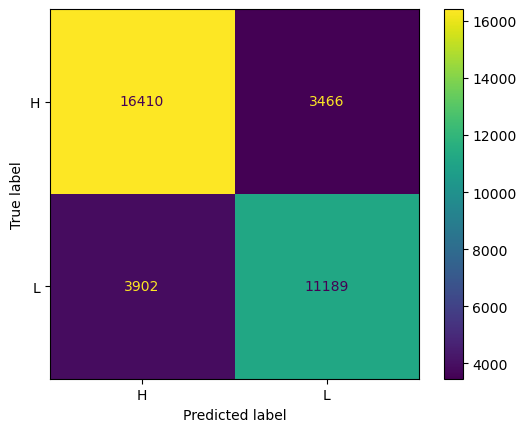

In [27]:
conf_matrix = confusion_matrix(test_Y, pred_Y)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=["H","L"]).plot()

In [28]:
print(classification_report(test_Y, pred_Y))

              precision    recall  f1-score   support

           H       0.81      0.83      0.82     19876
           L       0.76      0.74      0.75     15091

    accuracy                           0.79     34967
   macro avg       0.79      0.78      0.78     34967
weighted avg       0.79      0.79      0.79     34967

